In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [27]:
dataset = pd.read_csv('diabetes.csv')

In [28]:
X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataset['Outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [32]:
predictions = logistic.predict(X_test_scaled)
print("Logistic Regression Results:")
print(classification_report(y_test, predictions))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



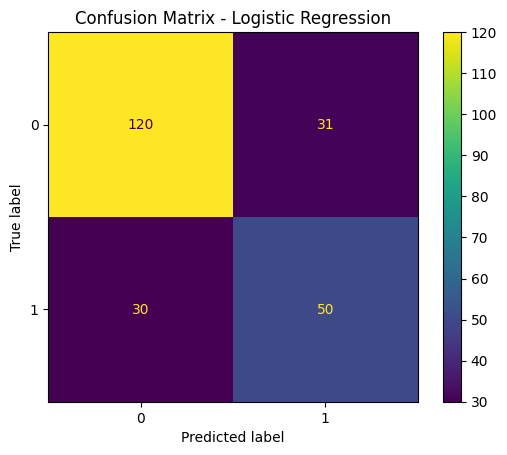

In [34]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [36]:
def cost_func(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return cost

In [37]:
def grad_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost_history.append(cost_func(X, y, theta))

    return theta, cost_history

In [38]:
X_custom = X_train_scaled[:, 1].reshape(-1, 1)  # using Glucose column
X_custom = np.hstack([np.ones((X_custom.shape[0], 1)), X_custom])  # adding intercept term
theta = np.zeros(2)
alpha = 0.01
iterations = 1000

In [39]:
theta_optimized, cost_history = grad_descent(X_custom, y_train, theta, alpha, iterations)

In [42]:
print("\nCustom Logistic Regression Results")
print("Optimized Theta:", theta_optimized)
print("Final Cost:", cost_history[-1])


Custom Logistic Regression Results
Optimized Theta: [-0.60919664  0.96555845]
Final Cost: 0.5254601937411844


In [43]:
X_test_custom = np.linspace(X_custom[:, 1].min(), X_custom[:, 1].max(), 300)
X_test_plot = np.hstack([np.ones((300, 1)), X_test_custom.reshape(-1, 1)])
y_prob = sigmoid(np.dot(X_test_plot, theta_optimized))

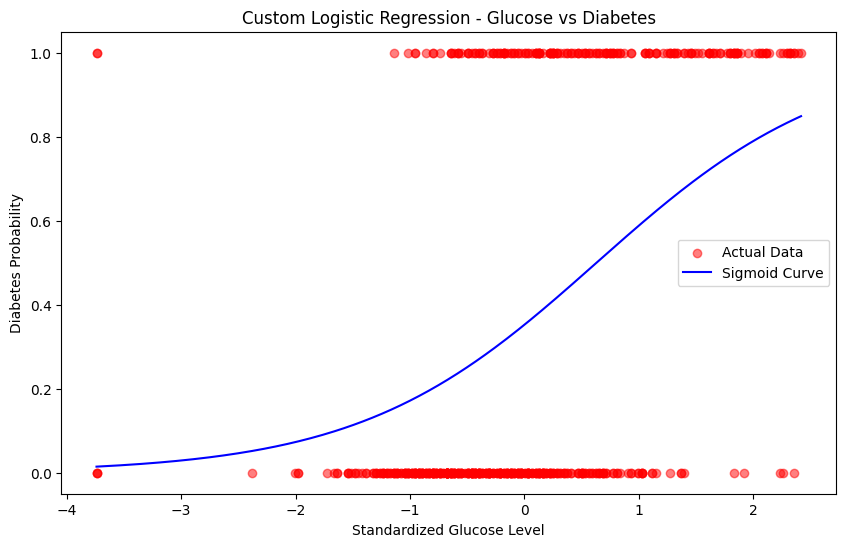

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_custom[:, 1], y_train, color='red', label="Actual Data", alpha=0.5)
plt.plot(X_test_custom, y_prob, label="Sigmoid Curve", color='blue')
plt.xlabel("Standardized Glucose Level")
plt.ylabel("Diabetes Probability")
plt.title("Custom Logistic Regression - Glucose vs Diabetes")
plt.legend()
plt.show()

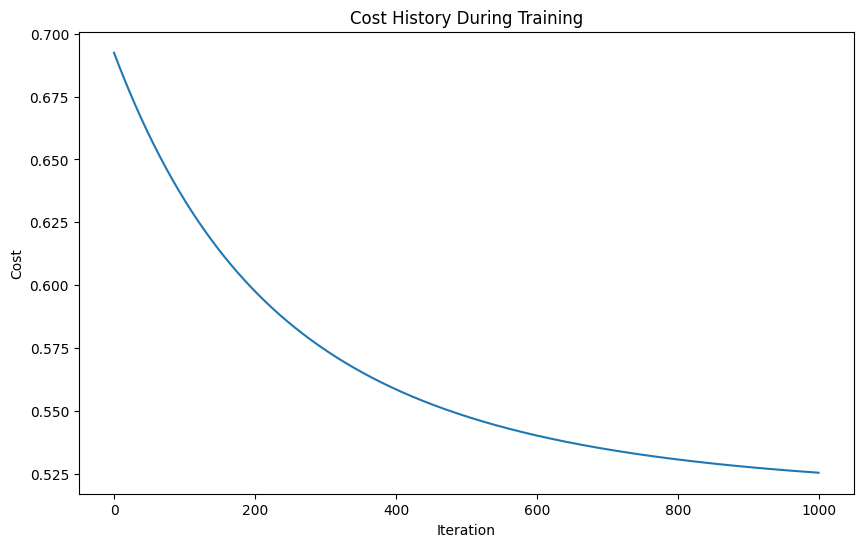

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History During Training")
plt.show()